# Dia 3 - Limpeza e Enriquecimento de Dados

Neste terceiro desafio do #7DaysOfCode, vamos entender a quantidade e quando se emprestaram os livros, no intuito de promover o uso da informação.

Vamos nessa!

### Importando bibliotecas

In [97]:
import pandas as pd

### Importando o Dataset

Importamos o Dataset gerado no Desafio02, que está salvo como `dataset_completo.csv`

In [98]:
df = pd.read_csv('../desafio03/dataset_completo.csv')

In [99]:
df.head(3)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_cdu
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaN,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2.008023e+09,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas


### Realizando a conversão das colunas de data para `datetime`

É necessário reconverter as colunas `data_emprestimo`, `data_renovacao` e `data_devolucao` para o formato `datetime` (como já haviamos feito no desafio01), pois o `pandas` não reconhece automaticamente o tipo após importar arquivos `.csv`.

In [100]:
# Convertendo `matricula_ou_siape` e, `string`
df['matricula_ou_siape'] = df['matricula_ou_siape'].astype(str)

# Verificando padrão das colunas de datas

df['data_emprestimo'] = pd.to_datetime(df['data_emprestimo'], errors='coerce')
df['data_devolucao'] = pd.to_datetime(df['data_devolucao'], errors='coerce')
df['data_renovacao'] = pd.to_datetime(df['data_renovacao'], errors='coerce')
df.head(2)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_cdu
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


### Verificando se há linhas válidas de empréstimos para todos os anos

In [101]:
df['data_emprestimo'].dt.year.value_counts()

data_emprestimo
2013    259598
2012    250260
2014    235725
2011    229548
2017    229527
2016    226380
2015    225317
2018    202613
2010    196147
2019    180028
2020     26636
Name: count, dtype: int64

In [102]:
df['data_emprestimo'].isnull().sum()

np.int64(0)

### Remoção de duplicatas por `id_emprestimo`

Para garantir que cada empréstimo seja contabilizado apenas uma vez, removemos registros duplicados com base no identificador único de empréstimo.

In [103]:
# Removendo duplicações por id_emprestimo
emprestimos = df.drop_duplicates(subset='id_emprestimo')

In [105]:
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_cdu
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119.0,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
4,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2009045971.0,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas


### Iniciando a análise exploratória dos dados

Verificando se há ocorrência de, em um mesmo empréstimo, mais de um livro haver sido emprestado.

In [106]:
# Testando se algum elemento em `id_emprestimo` se repete ao longo do dataset.
emprestimos['id_emprestimo'].duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2261774    False
2261775    False
2261776    False
2261777    False
2261778    False
Name: id_emprestimo, Length: 2257981, dtype: bool

Como `id_emprestimo` não se repete, isso indica que cada empréstimo representa um único exemplar emprestado, e cada exemplar corresponde a um empréstimo individual.

### Análise Anual de Empréstimos

O objetivo é contar a quantidade de empréstimos realizados por ano.

Para isso, iremos utilizar o método `goupby()`

In [111]:
emprestimos_ano = emprestimos.groupby(emprestimos['data_emprestimo'].dt.year)['id_emprestimo'].count()
emprestimos_ano

data_emprestimo
2010    196035
2011    229360
2012    250037
2013    259286
2014    235310
2015    224853
2016    225893
2017    229040
2018    202080
2019    179526
2020     26561
Name: id_emprestimo, dtype: int64

Podemos armazenar esse resultado em um novo DataFrame

In [112]:
# Resetando o índice e renomeando as colunas
emprestimos_por_ano = emprestimos_ano.reset_index()
emprestimos_por_ano.columns = ['ano', 'quantidade_emprestimos']

# Verificando o resultado
emprestimos_por_ano.head(4)


,ano,quantidade_emprestimos
0,2010,196035
1,2011,229360
2,2012,250037
3,2013,259286


### Plotando a relação Exemplares Emprestados x Ano

Para isso, faremos o `import` do pacote `matplotlib`

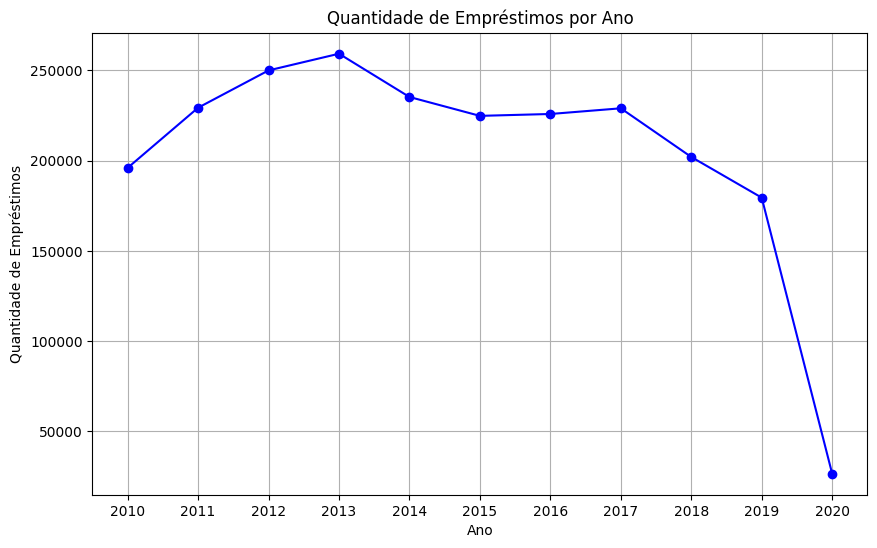

In [113]:
import matplotlib.pyplot as plt

# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(emprestimos_por_ano['ano'], emprestimos_por_ano['quantidade_emprestimos'], marker='o', linestyle='-', color='b')

# Adicionando título e rótulos aos eixos
plt.title('Quantidade de Empréstimos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Empréstimos')

# Forçando a exibição de todos os anos no eixo X
plt.xticks(ticks=emprestimos_por_ano['ano'])

# Exibindo o gráfico
plt.grid(True)
plt.show()

### Análise Gráfica

Observa-se uma tendência de crescimento no número de empréstimos entre 2010 e 2013, culminando no pico em 2013. A partir de 2014, os volumes iniciam uma leve retração, seguida de um período de estabilidade até 2017. No entanto, em 2018 e 2019, a biblioteca enfrenta quedas significativas, sem causa evidente nos dados — o que sugere a necessidade de investigação sobre possíveis fatores internos ou externos. Em 2020, há uma queda abrupta, compatível com o impacto da pandemia de COVID-19. A análise sugere que, salvo eventos excepcionais, a biblioteca vinha perdendo força em sua capacidade de atrair ou manter usuários após 2017.

### Análise Mensal de Empréstimos

O objetivo é contar a quantidade de empréstimos realizados por `mês`.

In [114]:
emprestimos_mes = emprestimos.groupby(emprestimos['data_emprestimo'].dt.month)['id_emprestimo'].count()
emprestimos_mes

data_emprestimo
1      72067
2     226587
3     275310
4     229953
5     222844
6     151633
7     130611
8     252681
9     226791
10    206434
11    180597
12     82473
Name: id_emprestimo, dtype: int64

In [115]:
# Resetando o índice e renomeando as colunas
emprestimos_por_mes = emprestimos_mes.reset_index()
emprestimos_por_mes.columns = ['mês', 'quantidade_emprestimos']

# Verificando o resultado
emprestimos_por_mes.head(4)

,mês,quantidade_emprestimos
0,1,72067
1,2,226587
2,3,275310
3,4,229953


In [116]:
emprestimos_por_mes['mês'].dtype

dtype('int32')

In [117]:
# Convertendo o número do mês para inteiro

emprestimos_por_mes['mês'] = emprestimos_por_mes['mês'].astype(int)
emprestimos_por_mes['mês'].dtype

dtype('int64')

### Plotando a relação Exemplares Emprestados x Mês

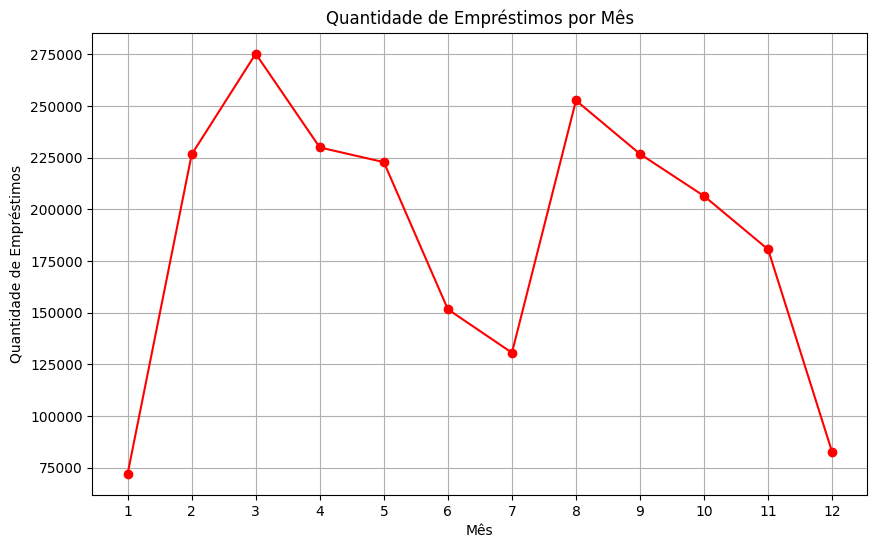

In [118]:
# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(emprestimos_por_mes['mês'], emprestimos_por_mes['quantidade_emprestimos'], marker='o', linestyle='-', color='r')

# Adicionando título e rótulos aos eixos
plt.title('Quantidade de Empréstimos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Empréstimos')

# Forçando a exibição de todos os anos no eixo X
plt.xticks(ticks=emprestimos_por_mes['mês'])

# Exibindo o gráfico
plt.grid(True)
plt.show()


### Utilizando os meses com seus nomes

In [119]:
# Convertendo os meses de número para nomes

nomes_meses = [
    'jan', 'fev', 'mar', 'abr', 'mai', 'jun',
    'jul', 'ago', 'set', 'out', 'nov', 'dez'
]

# Substitui os números pelos nomes
emprestimos_por_mes['mês'] = emprestimos_por_mes['mês'].apply(lambda x: nomes_meses[x - 1])

In [61]:
emprestimos_por_mes

,mês,quantidade_emprestimos
0,janeiro,72183
1,fevereiro,226945
2,março,275780
3,abril,230339
4,maio,223233
5,junho,151940
6,julho,130812
7,agosto,253099
8,setembro,227147
9,outubro,206765


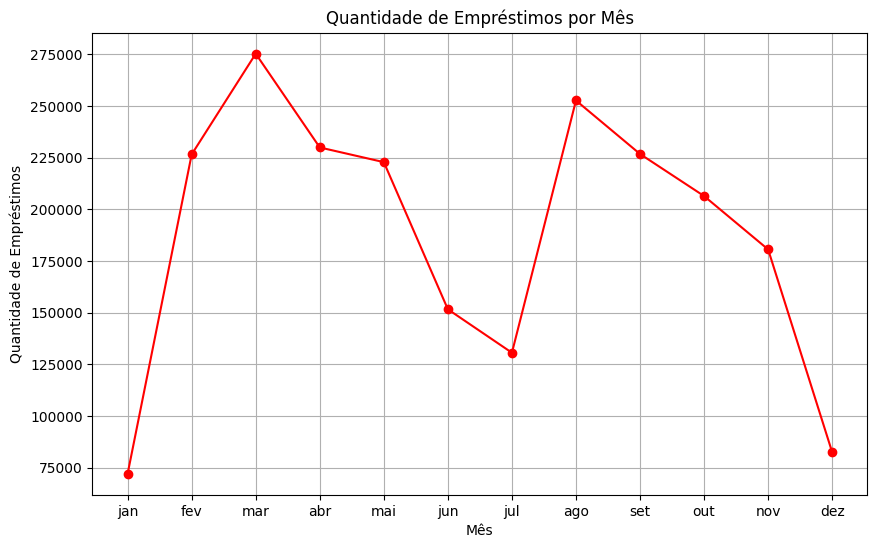

In [120]:
# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(emprestimos_por_mes['mês'], emprestimos_por_mes['quantidade_emprestimos'], marker='o', linestyle='-', color='r')

# Adicionando título e rótulos aos eixos
plt.title('Quantidade de Empréstimos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Empréstimos')

# Forçando a exibição de todos os anos no eixo X
plt.xticks(ticks=emprestimos_por_mes['mês'])

# Exibindo o gráfico
plt.grid(True)
plt.show()

### Análise Gráfica

A análise mensal dos empréstimos demonstra um comportamento cíclico ao longo do ano. Há um crescimento gradual entre fevereiro e maio, com pico em março, possivelmente relacionado ao início do semestre letivo e aumento da demanda acadêmica.

Nos meses de junho e julho, observa-se uma queda significativa nos empréstimos, refletindo o recesso de inverno. Em agosto, os empréstimos voltam a subir com o retorno das aulas, mas já apresentam declínio gradual a partir de setembro, reforçando que o segundo semestre pode ter menor intensidade de uso.

Os meses com menor demanda são dezembro e janeiro, período típico de férias de verão. Portanto, os melhores meses para programação de férias dos colaboradores e realização de atividades administrativas, treinamentos ou inventário de acervo são:

Baixa demanda: dezembro, janeiro, julho

Alta demanda: março e agosto (confirmando a suspeita da diretoria)

### Análise Horária de Empréstimos

O objetivo é contar a quantidade de empréstimos realizados por `hora`.

In [121]:
emprestimos_hora = emprestimos.groupby(emprestimos['data_emprestimo'].dt.hour)['id_emprestimo'].count()
emprestimos_hora

data_emprestimo
0         61
6         18
7      21610
8     112655
9     142340
10    199204
11    189040
12    155847
13    135350
14    162548
15    179270
16    226504
17    197008
18    196390
19    118796
20    153059
21     67767
22       460
23        54
Name: id_emprestimo, dtype: int64

In [122]:
# Resetando o índice e renomeando as colunas
emprestimos_por_hora = emprestimos_hora.reset_index()
emprestimos_por_hora.columns = ['hora', 'quantidade_emprestimos']

# Verificando o resultado
emprestimos_por_hora.head(4)

,hora,quantidade_emprestimos
0,0,61
1,6,18
2,7,21610
3,8,112655


### Plotando a relação Exemplares Emprestados x Hora

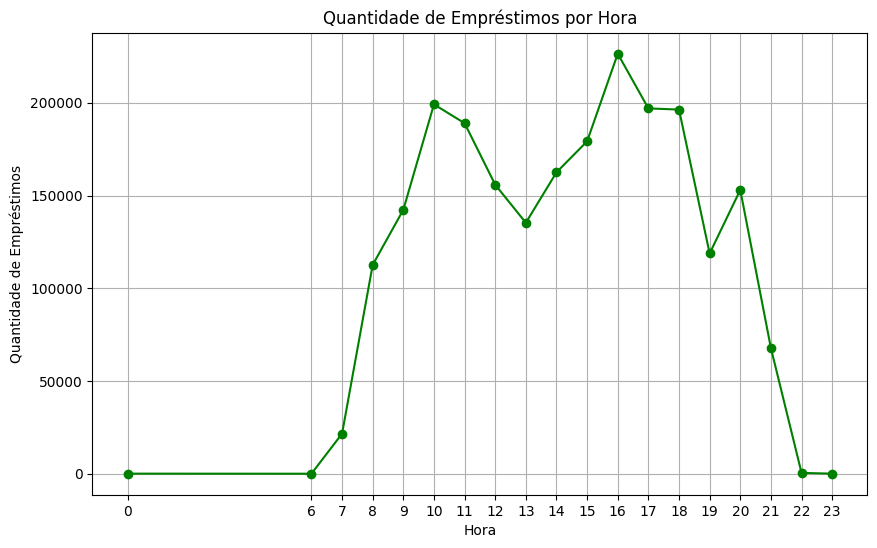

In [123]:
# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(emprestimos_por_hora['hora'], emprestimos_por_hora['quantidade_emprestimos'], marker='o', linestyle='-', color='g')

# Adicionando título e rótulos aos eixos
plt.title('Quantidade de Empréstimos por Hora')
plt.xlabel('Hora')
plt.ylabel('Quantidade de Empréstimos')

# Forçando a exibição de todos os anos no eixo X
plt.xticks(ticks=emprestimos_por_hora['hora'])

# Exibindo o gráfico
plt.grid(True)
plt.show()

### Análise Gráfica

A distribuição horária dos empréstimos ao longo do dia revela um padrão concentrado no horário comercial. O fluxo começa a aumentar às 8h, com picos de atendimento entre 10h e 17h, especialmente às 16h, que registra o maior volume de empréstimos. Após às 20h, o movimento é praticamente inexistente.

Essa concentração indica que o horário de maior demanda por atendimento ao usuário ocorre entre 9h e 18h. Portanto:

Atividades que demandam foco e não envolvam atendimento ao público (como reuniões internas, processamento técnico ou capacitações) devem ser priorizadas fora do intervalo de 9h–18h, especialmente antes das 8h ou após as 18h, ou ainda entre 12h e 13h, onde há uma leve queda na curva.

A alocação de pessoal deve ser reforçada entre 10h e 17h, com foco especial nas 14h–17h, que concentram os maiores volumes.

### Exportação dos Dados

Exportamos os novos DataFrames para o desafio04, para utilização posterior.

In [124]:
# Exportando o DataFrame para csv para uso no desafio03

df.to_csv('../desafio04/dataset_completo.csv', index = False)
emprestimos_por_ano.to_csv('../desafio04/emprestimo_ano.csv', index = False)
emprestimos_por_mes.to_csv('../desafio04/emprestimo_mes.csv', index = False)
emprestimos_por_hora.to_csv('../desafio04/emprestimo_hora.csv', index = False)